In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df_music=pd.read_csv("../Data/cleaned_music_ds.csv")

## K Means Clustering Without Scaling

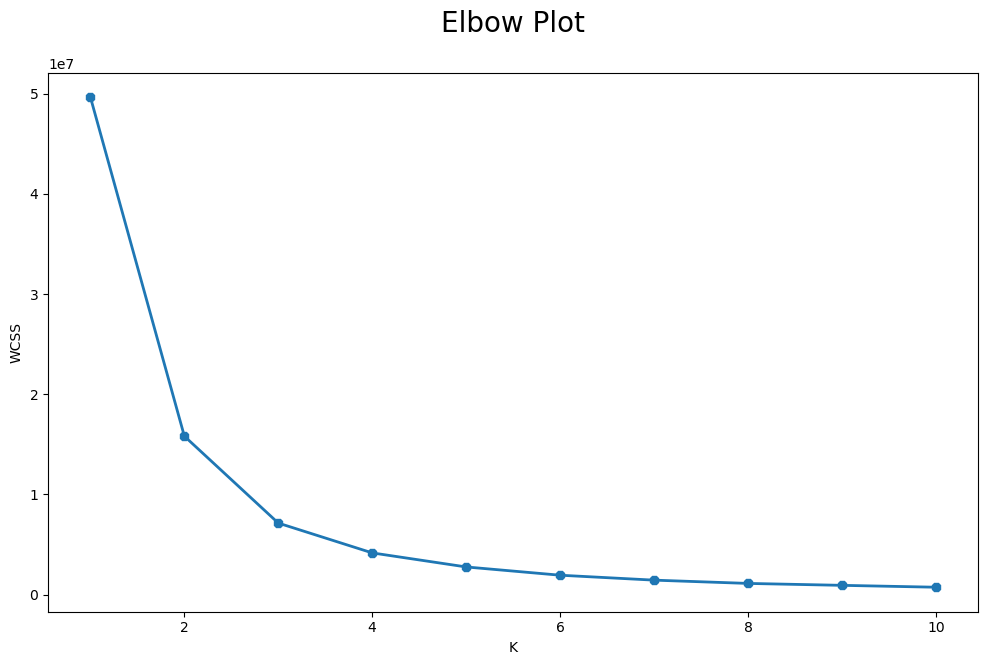

In [3]:
# create an elbow plot of WSS


X1 = df_music.loc[:,['len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'age']].values

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

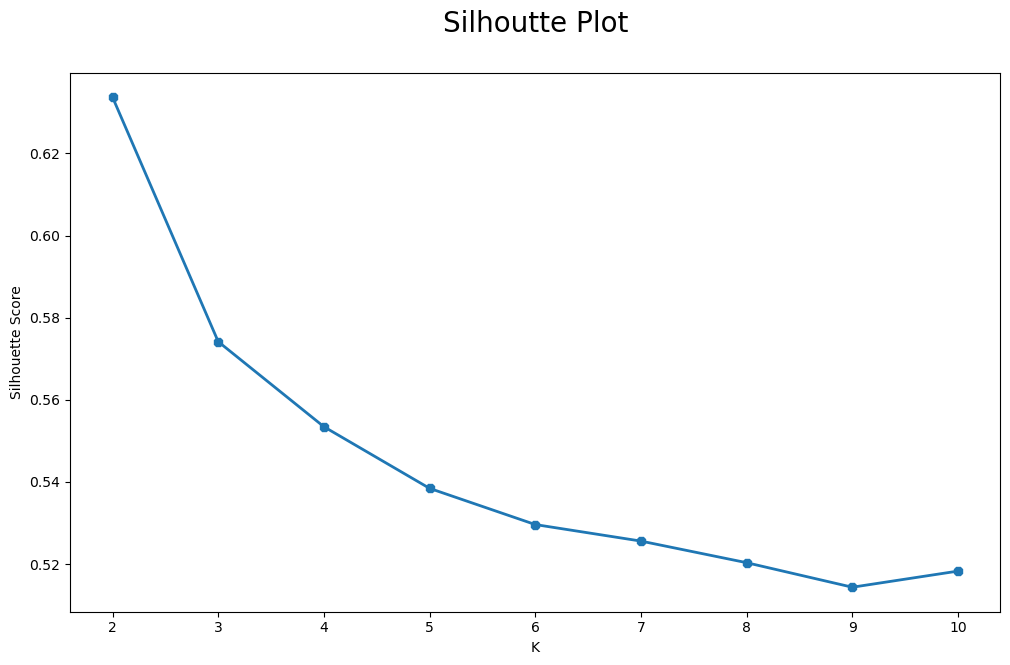

In [4]:
# Create a plot of Silhoutte Score

silhouette = []
for k in range(2, 11):
   #create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()



 **The elbow plot and silhoutte plot optimal k is 2**

In [5]:
#Create a KMeans object with this optimal number of clusters. Name this object `kmeans`
kmeans= KMeans(n_clusters=2, init ="k-means++", n_init=20,random_state=30)

#Fit KMeans object using ""X1" data
kmeans.fit(X1)

KMeans(n_clusters=2, n_init=20, random_state=30)

In [6]:
# Generate labels for the  dataset

labels = kmeans.fit_predict(X1)
labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [7]:
# output the centroids of your clusters

kmeans.cluster_centers_

array([[5.33048398e+01, 2.17235562e-02, 1.13684578e-01, 1.30860407e-01,
        6.05778398e-02, 1.55403652e-02, 1.71149082e-02, 5.63898705e-02,
        7.94630507e-02, 6.02114814e-02, 6.51910069e-02, 4.21535954e-02,
        5.14958835e-02, 2.40541303e-02, 1.46501246e-01, 3.18133477e-02,
        4.58547046e-01],
       [1.33491185e+02, 1.92282656e-02, 1.32736019e-01, 9.07117330e-02,
        4.74802181e-02, 2.31747413e-02, 1.68310124e-02, 2.50315246e-02,
        6.80300967e-02, 2.10513434e-01, 4.43603824e-02, 6.35489124e-02,
        4.13822738e-02, 2.44634907e-02, 7.69898834e-02, 2.84874210e-02,
        3.22776879e-01]])

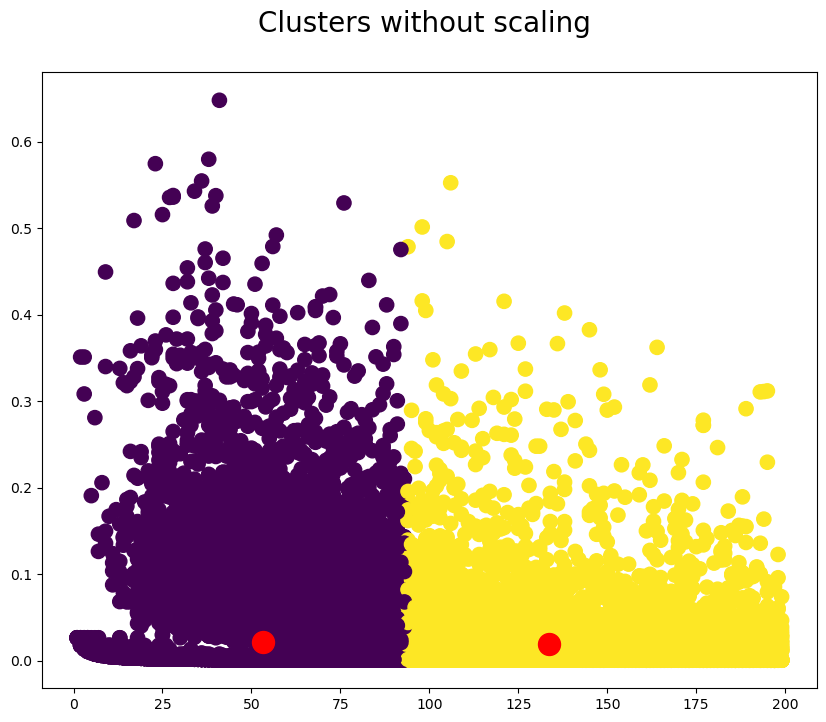

In [8]:
# view 2D clusters

plt.figure(figsize = (10, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters without scaling \n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

## K Means Clustering  with Scaling

In [9]:
# create an Elbow Plot of WCSS on scaled values

# create and use the standard scaler object to ensure all variables have equal range

scaler = StandardScaler()

# fit and transform to create a scaled version of 'X1'

X1_scaled = scaler.fit_transform(X1)

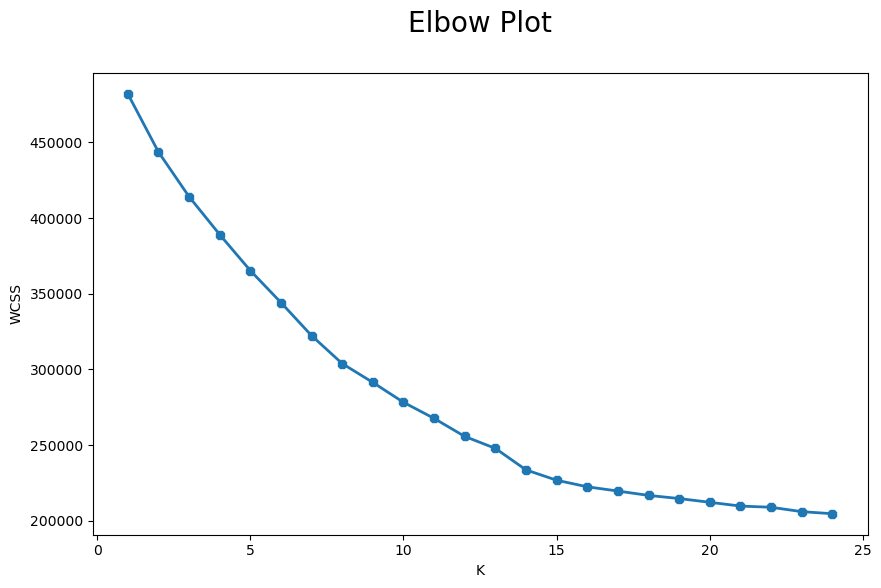

In [10]:
wcss_scaled = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters = k, init = 'k-means++',n_init=20,random_state=30)

    #Fit your kmeans algorithm on your scaled dataset
    kmeans.fit(X1_scaled)

    #Append the WCSS aka inertia to your wcss_scaled list
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (10, 6))

plt.plot(range(1, 25), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show() 

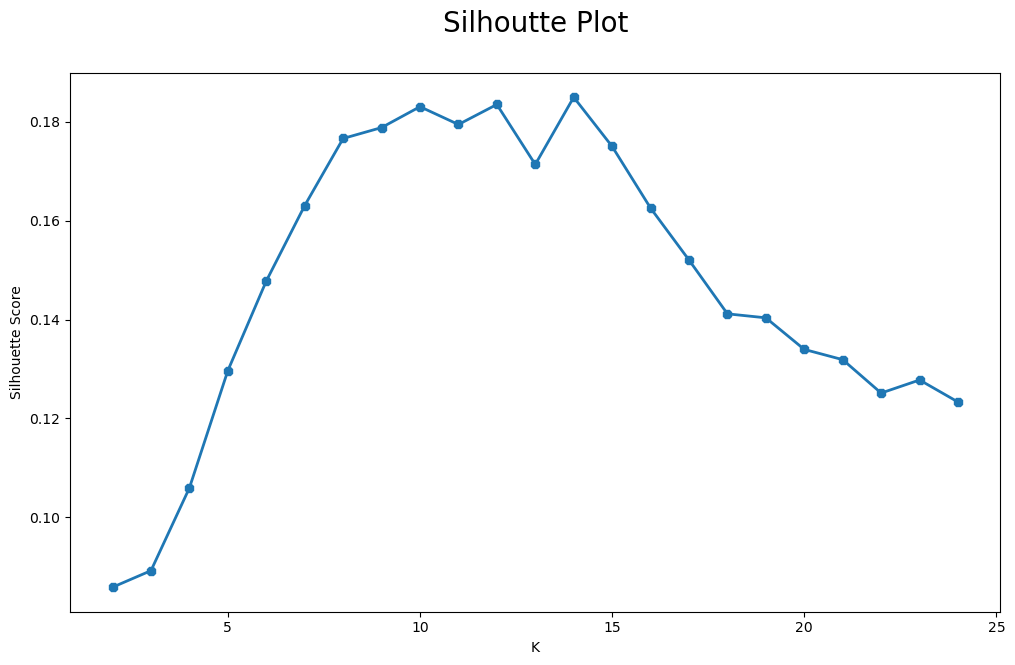

In [11]:
scaler = StandardScaler()

#Fit and transform to create a scaled version of 'X1'

X1_scaled = scaler.fit_transform(X1)


#Create a plot of silhoutte score

silhouette_scaled = []
for k in range(2, 25):
    # Create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans (n_clusters = k, init = 'k-means++',n_init=20,random_state=30)
    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 25), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

**The optimal k for both elbow plot and sihouette plot is 13**

In [12]:
#Create a new KMeans object with this optimal number of clusters. Name this object `kmeans_scaled`

kmeans_scaled = KMeans(n_clusters=13,init="k-means++",n_init=20,random_state=30)

#Fit this KMeans object on your data

kmeans.fit_transform(X1_scaled)

array([[5.36401905, 4.62796437, 4.0601441 , ..., 5.38939236, 2.87407834,
        5.21173361],
       [5.28329349, 2.72331913, 5.16483844, ..., 3.46706903, 5.29521407,
        5.32950426],
       [6.33071803, 5.37392195, 5.30256982, ..., 6.37629484, 4.93288353,
        5.06191073],
       ...,
       [3.77276284, 3.9424423 , 3.79669262, ..., 4.63751627, 4.56536474,
        5.00102646],
       [5.15338018, 5.13471596, 4.95640489, ..., 3.86671034, 5.2293177 ,
        5.71412483],
       [5.46354493, 5.68328585, 5.23496105, ..., 5.85066241, 5.63716729,
        6.27012447]])

In [13]:
#Generate labels for the  dataset

labels =  kmeans_scaled.fit_predict(X1_scaled)
labels

array([ 3,  0, 10, ...,  7,  7,  7], dtype=int32)

In [14]:
# Get centroids of clusters

Scaled_centroids = kmeans.cluster_centers_
Scaled_centroids

array([[ 8.05016232e-02, -2.46921809e-01,  5.67853370e-02,
        -1.46438384e-01, -1.88694563e-01, -1.84159328e-01,
        -1.04634848e-01, -2.62828823e-01, -4.39084330e-01,
        -1.62741990e-02, -1.40487866e-01,  3.06657790e+00,
        -2.30549077e-01, -1.45396670e-01, -2.61596495e-01,
        -2.52647307e-01,  5.31157573e-02],
       [-5.69307450e-01, -1.76343731e-01, -4.68104391e-01,
         2.11073564e+00, -1.65159407e-01, -2.38125204e-01,
        -1.77202904e-01,  2.36874122e-03, -4.47799521e-01,
        -4.53613405e-01, -1.53902510e-01, -1.94896185e-01,
        -6.27620581e-02, -1.14993777e-01, -2.67863090e-01,
        -7.27147955e-02,  8.82370595e-01],
       [-1.76104792e-01, -2.37591241e-01,  1.52551284e+00,
        -5.21783505e-01, -2.83858369e-01, -1.64822932e-01,
        -1.42845815e-01, -2.93281384e-01,  1.72361913e+00,
        -3.83507518e-01, -3.41306476e-01, -2.78964083e-01,
        -2.81807800e-01, -1.40725988e-01, -5.12882456e-01,
        -1.27745826e-01, -2.7

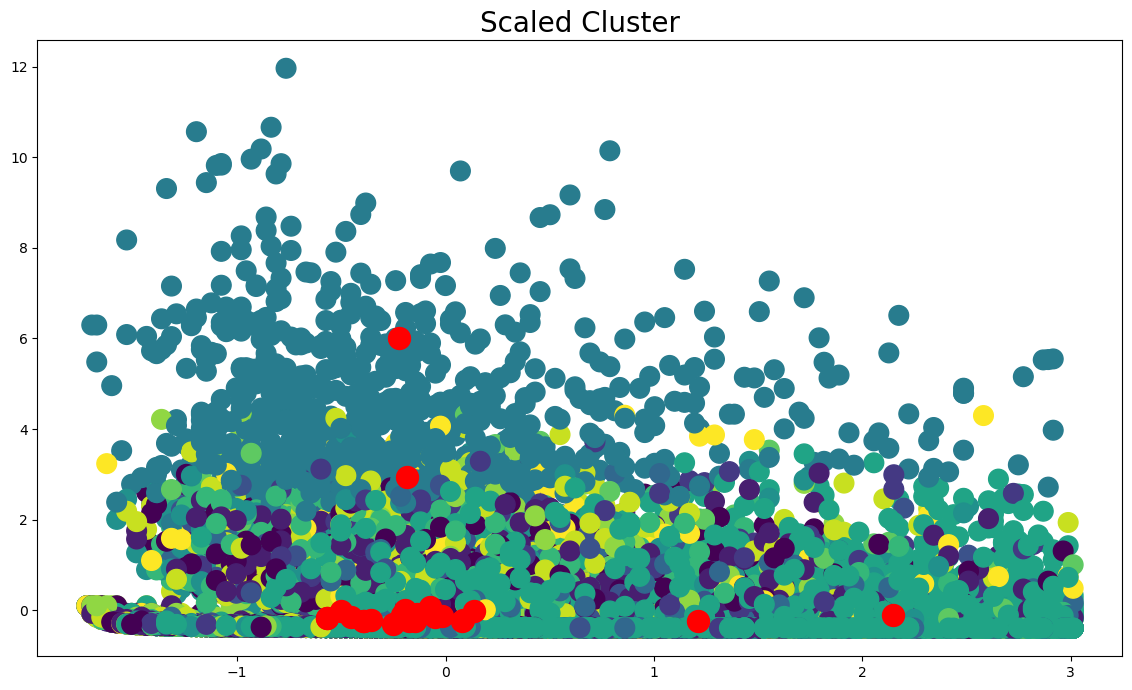

In [15]:
###view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 200)
plt.scatter(Scaled_centroids[:, 0],Scaled_centroids [:, 1], color = 'red', s = 250)
plt.title("Scaled Cluster", fontsize = 20)
plt.xlabel("")
plt.ylabel("")
plt.show()

###  Scaling the dataset helped to identify more features but as for clustering it wasn't as helpful. Currently there are too many features lets try PCA to reduce some of those features


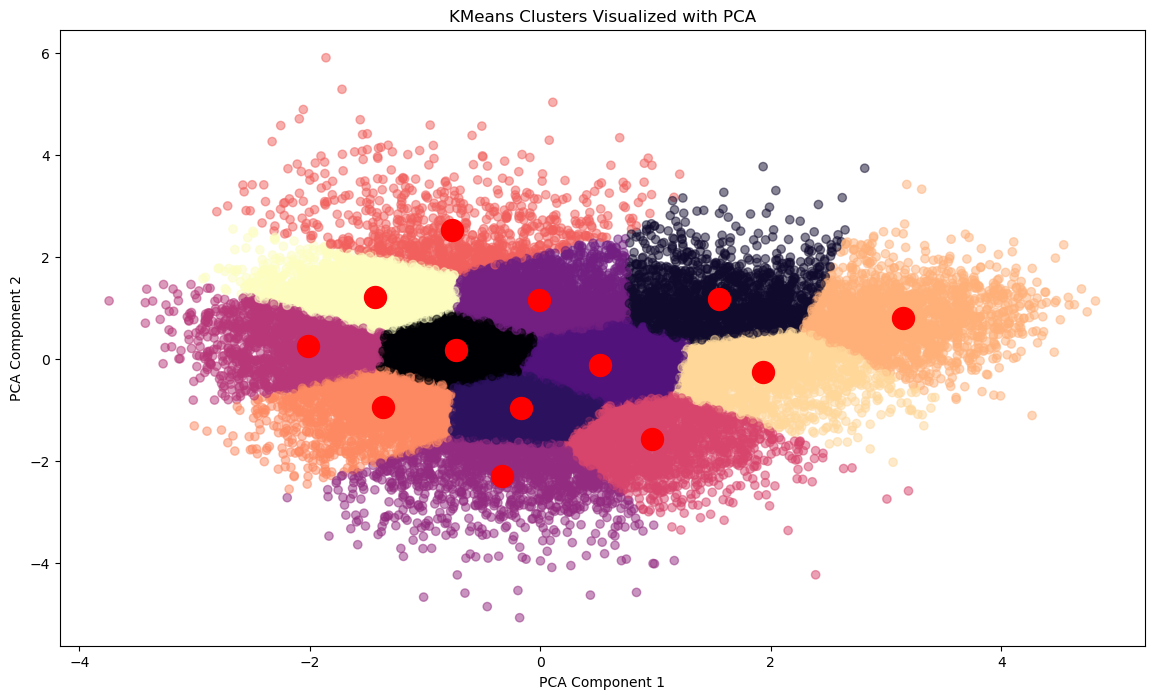

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1_scaled)


clusters = kmeans_scaled.fit_predict(X_pca)

plt.figure(figsize=(14, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = clusters, cmap= "magma", alpha = 0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color="red", s=250)
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Clustering with PCA in 3D

In [16]:
# Using PCA from sklearn PCA
pca = PCA(n_components=3)
ds_pca= pca.fit_transform(X1_scaled)


In [17]:
#set up parameters for prediction
kmeans_scaled = KMeans(n_clusters=13, random_state=30)
clusters = kmeans_scaled.fit_predict(ds_pca)

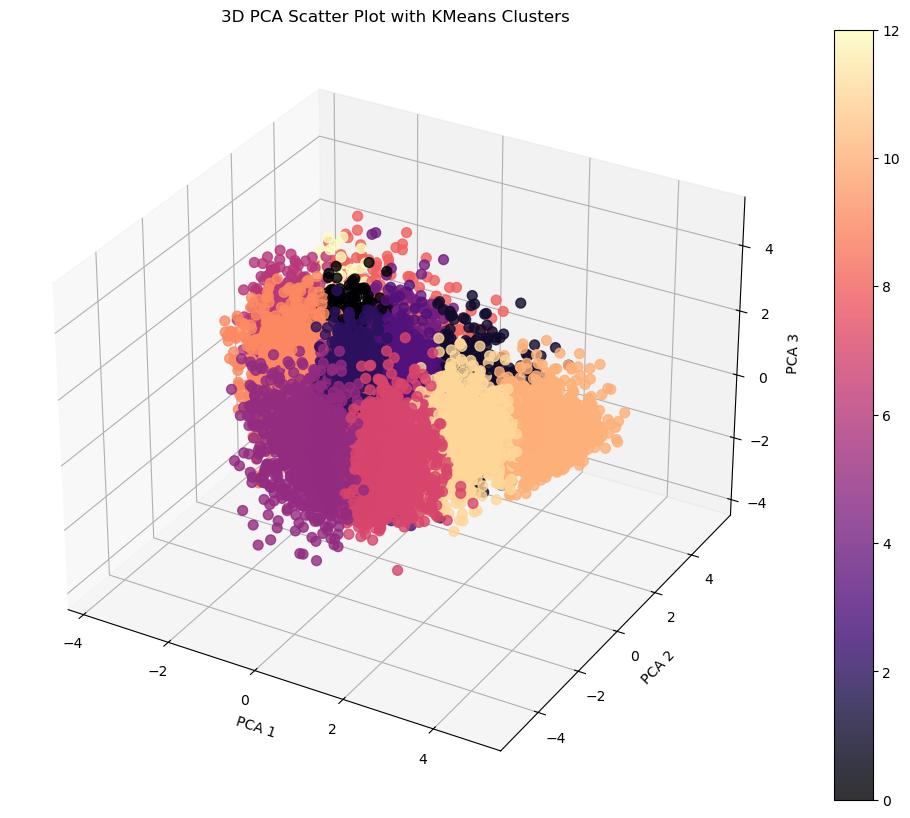

In [70]:
#Plot with PCA with 3D graph

# Step 3: Create a 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(ds_pca[:, 0], ds_pca[:, 1], ds_pca[:, 2], c=clusters, cmap="magma", s=50, alpha=0.8)
ax.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color="red", s=250)

# Add labels
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.title('3D PCA Scatter Plot with KMeans Clusters')

# Add a colorbar
plt.colorbar(sc)
plt.show()


### With PCA we are able to achieve the best clusters

In [19]:
# Reintroducing cluster to dataset

df_music["Cluster"] = kmeans_scaled.fit_predict(ds_pca)

In [20]:
# Read train dataset into Dataframe
orgin_df = pd.read_csv("/Users/sa19/Desktop/Music_Recommendation_Algorithm/Data/train.csv")


# Create a label for previously removed categorical data
label1= orgin_df[["genre","artist_name","track_name", "release_date"]]

#Add label1 to df_music Dataframe
label1 = pd.concat([label1, df_music], axis=1)

label1

,genre,artist_name,track_name,release_date,Unnamed: 0,release_date,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,0,1950,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000,3
1,pop,frankie laine,i believe,1950,1,1950,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.000000,10
2,pop,johnnie ray,cry,1950,2,1950,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000,5
3,pop,pérez prado,patricia,1950,3,1950,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000,5
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,4,1950,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,hip hop,mack 10,10 million ways,2019,28357,2019,78,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,0.014286,2
28358,hip hop,m.o.p.,ante up (robbin hoodz theory),2019,28358,2019,67,0.001284,0.001284,0.035338,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286,1
28359,hip hop,nine,whutcha want?,2019,28359,2019,77,0.001504,0.154302,0.168988,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286,8
28360,hip hop,will smith,switch,2019,28360,2019,67,0.001196,0.001196,0.001196,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286,6


In [21]:
#Lets see how many songs are in each cluster
df_music["Cluster"].value_counts().sort_index().to_frame(name='Count')

,Count
Cluster,
0,1538
1,1916
2,2421
3,3186
4,2229
5,1696
6,1726
7,1492
8,2079


In [75]:
# Lets take a look at some of the songs in "Cluster 5"
label1[df_music["Cluster"] == 7].sample(5)

,genre,artist_name,track_name,release_date,Unnamed: 0,release_date,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
7153,country,carl smith,lovin' is livin',1957,7153,1957,59,0.247844,0.001170,0.058777,...,0.001170,0.479774,0.001170,0.001170,0.001170,0.001170,0.001170,0.001170,0.900000,7
17247,jazz,doris day,"ready, willing and able",1954,17247,1954,62,0.093767,0.001350,0.001350,...,0.093013,0.319948,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.942857,7
5000,pop,justin timberlake,(oh no) what you got,2002,5000,2002,105,0.082722,0.000585,0.000585,...,0.000585,0.000585,0.000585,0.000585,0.066022,0.000585,0.000585,0.054940,0.257143,7
13113,blues,don covay,take this hurt off me,1965,13113,1965,106,0.552316,0.000619,0.000619,...,0.000619,0.000619,0.000619,0.000619,0.000619,0.041442,0.337049,0.000619,0.785714,7
7484,country,patsy cline,your cheatin' heart,1962,7484,1962,34,0.198725,0.002024,0.002024,...,0.002024,0.002024,0.002024,0.002024,0.002024,0.002024,0.412293,0.002024,0.828571,7


In [60]:
import pandas as pd
kmeans_scaled = KMeans(n_clusters=13, random_state=42)
kmeans_scaled.fit(X1_scaled)   

# Use numerical variables to find cluster center
columns = ['len','dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age']

# Create the cluster centers DataFrame
cluster_centers_df = pd.DataFrame(kmeans_scaled.cluster_centers_, columns=columns)
cluster_centers_df.index = [f"Cluster {i}" for i in range(len(cluster_centers_df))]

# Display centroids 
cluster_centers_df


,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
Cluster 0,-0.157386,-0.058040,-0.065869,-0.083756,-0.070545,-0.076306,4.416243,-0.094159,-0.289369,-0.108650,-0.045421,-0.155943,-0.279853,0.044098,-0.119283,-0.103258,0.272894
Cluster 1,1.216307,-0.104328,-0.327711,-0.433657,-0.273647,0.044612,-0.096987,-0.332474,-0.148447,2.129014,-0.299050,0.029421,-0.226775,-0.131514,-0.569855,-0.184694,-0.528319
Cluster 2,0.123739,-0.228400,0.086606,-0.121104,-0.203493,-0.190328,-0.079778,-0.269588,-0.408353,-0.013636,-0.147383,2.880126,-0.234859,-0.100839,-0.261490,-0.248607,0.025659
Cluster 3,-0.198478,0.008691,-0.420882,-0.402550,3.119700,-0.075896,-0.134547,-0.169234,-0.021421,-0.349424,-0.230704,-0.129687,-0.029903,-0.136510,-0.377479,-0.042178,0.070671
Cluster 4,-0.357466,-0.181453,-0.139162,-0.049448,-0.243646,-0.207331,-0.189010,-0.188084,2.378744,-0.237795,-0.298715,-0.364976,-0.378653,-0.237780,0.219452,-0.164407,0.053649
Cluster 5,-0.519891,-0.025677,-0.515221,-0.301339,-0.159532,-0.159006,-0.102854,3.417647,-0.008640,-0.458078,-0.166418,-0.300693,0.133738,-0.147547,-0.295854,-0.104695,0.634911
Cluster 6,0.057573,-0.232230,1.857300,-0.349306,-0.220238,-0.173852,-0.160968,-0.253065,-0.206913,-0.380845,-0.287144,-0.217526,0.232114,0.252855,-0.401625,-0.153400,-0.269301
Cluster 7,-0.227228,4.270102,-0.332911,-0.173160,0.035144,-0.020324,-0.029734,0.047432,-0.293327,-0.148576,-0.025513,-0.314143,-0.296611,-0.200764,-0.015411,-0.050126,0.320657
Cluster 8,0.165368,-0.034203,-0.011244,-0.103655,-0.106913,4.175952,-0.116324,-0.175782,-0.242427,0.163523,-0.175018,-0.221884,-0.264887,-0.098581,-0.224036,-0.077278,-0.197662
Cluster 9,-0.314811,-0.123955,-0.426141,-0.339988,-0.195261,-0.185435,-0.161413,-0.114041,-0.180419,-0.421960,-0.221956,-0.268366,0.144804,-0.025106,1.814585,-0.124873,0.060871


# Recommended Prediction

In [22]:
# Read recommend csv into Dataframe
Rec_music=pd.read_csv("../Data/recommend.csv")

Rec_music.head()


,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429


In [23]:
# Drop all categorical features not needed for modeling 

Rec_clean = Rec_music.drop(["Unnamed: 0","artist_name","lyrics", "track_name", "genre", "topic", "like/girls", "release_date"], axis=1)
Rec_clean

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429
5,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,0.001462,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429
6,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,0.012990,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714
7,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,0.001645,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286
8,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,0.001504,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714
9,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,0.000711,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143


In [31]:
# Create new variable for transformation
Pred1 = Rec_clean.loc[:, ['dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age', 'len']].values 


# Scaling the test data

scaler = StandardScaler()
Pred1_scaled = scaler.fit_transform(Pred1)

#Transforms the scaled test data (Pred1_scaled) into the same 3 principal components 
#using the PCA model previously trained on the training data

Pred1_pca = pca.transform(Pred1_scaled)

# Fit the KMeans model on the scaled data and assign cluster labels to the original dataframe
Rec_clean['Cluster'] = kmeans_scaled.predict(Pred1_pca)

Rec_clean

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,8
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,3
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,1
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,8
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429,12
5,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,0.001462,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429,12
6,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,0.012990,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714,3
7,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,0.001645,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286,12
8,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,0.001504,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,10
9,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,0.000711,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143,11


In [58]:
# Return columns that were dropped
label2 = Rec_music[["artist_name","lyrics", "track_name", "genre", "topic", "like/girls", "release_date"]]

# Concatenate the labels with the test data (including cluster assignments) for descriptive analysis
label2 = pd.concat([label2, Rec_clean], axis=1)


In [57]:
Rec_clean["Cluster"].value_counts().sort_index().to_frame(name='Count')

,Count
Cluster,
1,1
3,2
8,2
10,1
11,1
12,3


In [54]:
label2[Rec_clean["Cluster"] == 8].sample(2)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
3,pop,jerry lee lewis,your cheating heart,1960,25,0.204740,0.002506,0.002506,0.129818,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,8
0,rock,godsmack,immune,1998,74,0.000907,0.348191,0.375448,0.000907,0.225414,...,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,8


### My predict model didn't do a great job clustering similar sound together  which is disappointing.



### Final Remarks

**This unsupervised learning model successfully identified underlying themes across a diverse set of songs using KMeans clustering and PCA. By reducing the** 

**dimensionality of the dataset to two and three principal components, the model retained the core variance while enabling effective visualization and clustering.**
 
**The optimal number of clusters (13) was determined using both the elbow and silhouette methods, balancing model simplicity with interpretability.**

**Each cluster surfaced meaningful groupings based on lyrical content and theme rather than genre or release year.** **For example, some clusters emphasized** 

**spirituality and family, while others centered around romance or emotional intensity.** **These patterns suggest that the model was able to extract** 

**abstract, human-relevant insights from numerical features—providing a unique lens for understanding lyrical trends across time and genre.**